In [1]:
from google.colab import files
import pandas as pd

#
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [6]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


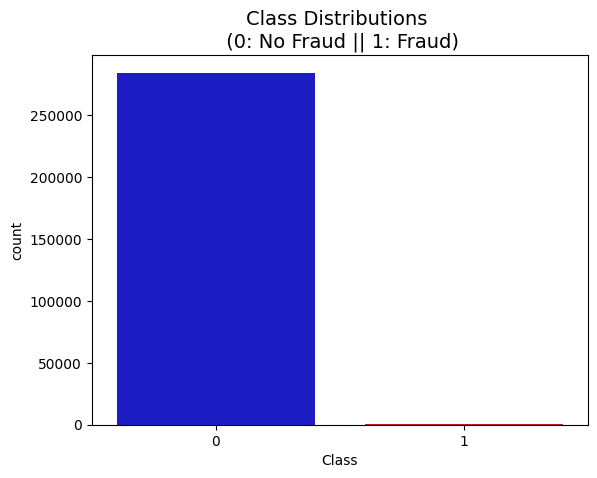

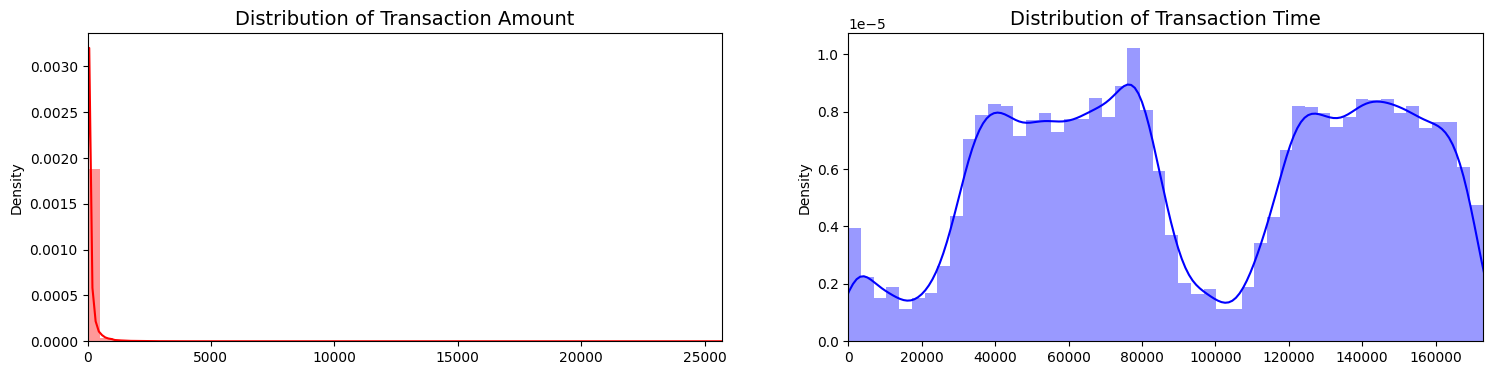

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Logistic Regression

[INFO] Logistic Regression - Best Params with RandomSearch: {'penalty': 'l2', 'C': 100}

=== Logistic Regression: Classification Report on Training (5 fold) ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.06      0.92      0.11       394

    accuracy                           0.97    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.97      0.99    227845


=== Logistic Regression - CLASSIFICATION REPORT (TEST SET) ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix (test):
[[55429  1435

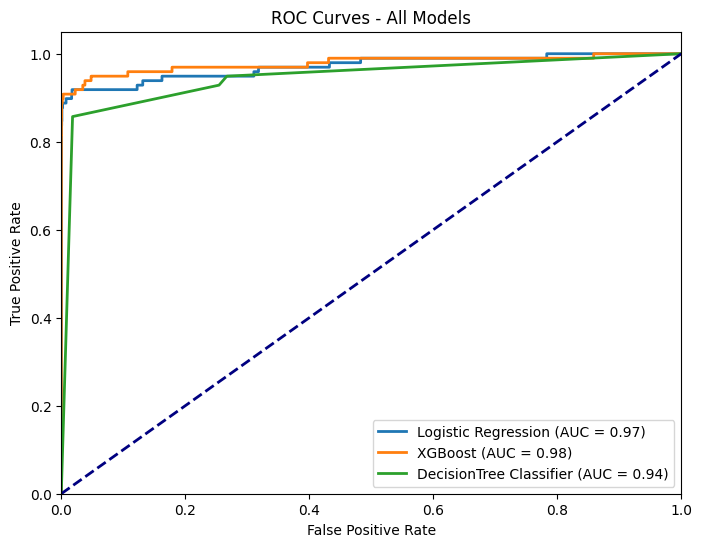

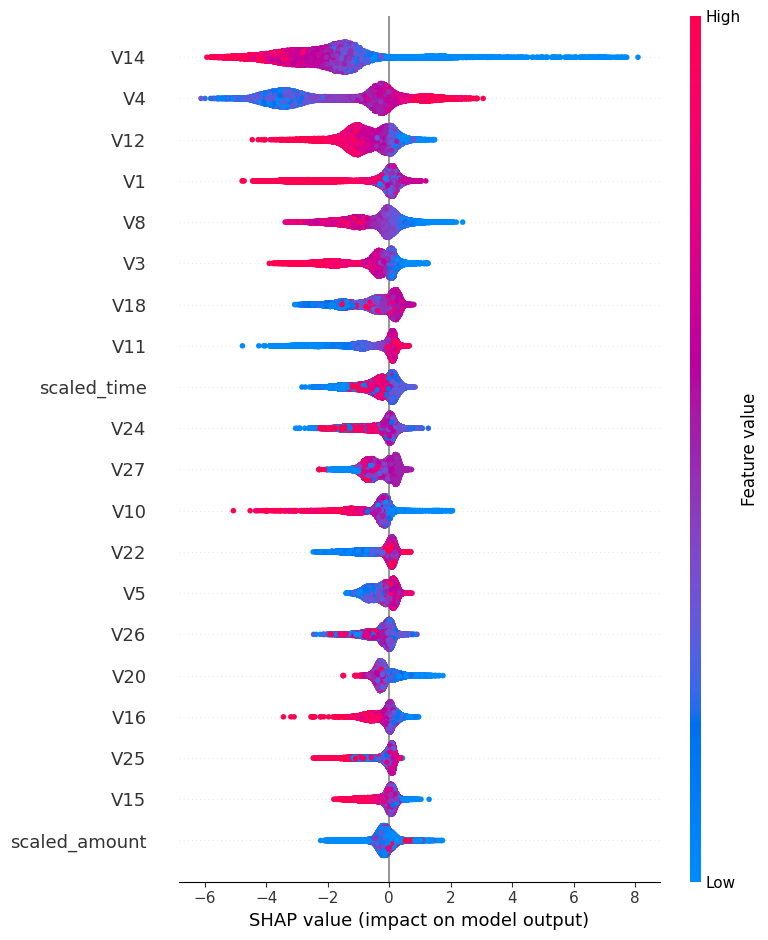

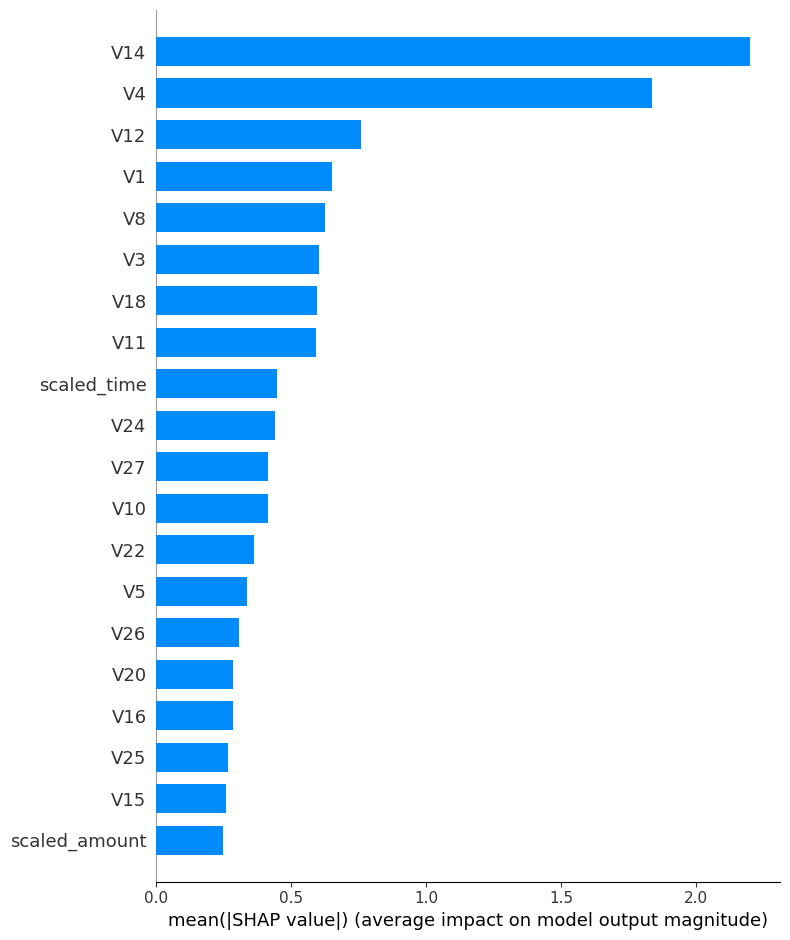

In [7]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from xgboost import XGBClassifier
import shap

# Load the data
#df = pd.read_csv('\creditcard.csv')

# Plot to see how many are in default and how many are not
# 99.83% are not
# 0.17% are

colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


#distributions of transaction amount and transaction time

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

# Now let's scale the Time and Amount columns like the rest of the dataset
# Then we create a subsample with the same number of fraud and non-fraud observations
# There are 492 fraud cases in the dataset, so we randomly select 492 non-fraud cases and combine them

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

#MODELS

def train_model_cv_holdout_with_train_report(params, Model, X_train, X_test, y_train, y_test, model_name):
    """
    1) Run RandomizedSearchCV on the entire X_train to find the best hyperparameters.
    2) Using best_params, perform a "manual" cross-validation (K=5) on X_train,
       collect predictions, and print a SINGLE aggregated classification_report on training.
    3) Train the final model (with best_params) on the FULL X_train.
    4) Evaluate on X_test and print the classification_report for the test set.
    5) Return a dictionary with the final metrics (test set).
"""
    from imblearn.pipeline import make_pipeline
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
    from sklearn.metrics import (
        classification_report, confusion_matrix,
        accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    )

    # A) find best_params with RandomizedSearchCV (CV on X_train)
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    rand_search = RandomizedSearchCV(
        estimator=Model,
        param_distributions=params,
        n_iter=4,
        scoring='f1',
        cv=inner_cv,
        n_jobs=-1,
        random_state=42
    )

    # Pipeline "temporary" for the parameters research
    pipeline_search = make_pipeline(
        SMOTE(sampling_strategy='minority', random_state=42),
        rand_search
    )

    # Fit on TRAIN (80%)
    pipeline_search.fit(X_train, y_train)

    # optimal parameters
    best_params = rand_search.best_params_
    print(f"\n[INFO] {model_name} - Best Params with RandomSearch:", best_params)

    # B) Cross-validation (5 fold) on training to have SINGLE REPORT
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    all_train_true = []
    all_train_pred = []

    # Final modelbest_params
    # build again the model instance with best parameters
    best_model = Model.set_params(**best_params)
    # and a pipeline with SMOTE + best_model
    pipeline_final_train = make_pipeline(
        SMOTE(sampling_strategy='minority', random_state=42),
        best_model
    )

    for train_idx, val_idx in outer_cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # train on (X_tr, y_tr)
        pipeline_final_train.fit(X_tr, y_tr)

        # forecast on (X_val, y_val)
        y_val_pred = pipeline_final_train.predict(X_val)

        # aggregate report
        all_train_true.extend(y_val)
        all_train_pred.extend(y_val_pred)

    print(f"\n=== {model_name}: Classification Report on Training (5 fold) ===")
    print(classification_report(all_train_true, all_train_pred))

    # C) Train on all training set
    pipeline_final_train.fit(X_train, y_train)

    # D) Final Valutation ontest set (20%)
    y_pred_test = pipeline_final_train.predict(X_test)
    y_pred_proba = pipeline_final_train.predict_proba(X_test)[:, 1]

    print(f"\n=== {model_name} - CLASSIFICATION REPORT (TEST SET) ===")
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix su test
    print("Confusion Matrix (test):")
    print(confusion_matrix(y_test, y_pred_test))

    # Metrics on test
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, average='macro')
    rec = recall_score(y_test, y_pred_test, average='macro')
    f1 = f1_score(y_test, y_pred_test, average='macro')
    auc = roc_auc_score(y_test, y_pred_test)

    return {
        'Algorithm': model_name,
        'Model Score': f"{round(acc * 100, 2)}%",
        'Precision': round(prec, 2),
        'Recall': round(rec, 2),
        'F1 score': round(f1, 2),
        'ROC-AUC score': round(auc, 2),
        'y_test': y_test,
        'y_pred_proba': y_pred_proba,
        'model': pipeline_final_train
    }, best_params

#############################################
# 3) split train–test (80–20)
#############################################
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



#############################################
# 4) Create un DataFrame for the results
#############################################
Models = pd.DataFrame(columns=['Algorithm', 'Model Score', 'Precision', 'Recall', 'F1 score', 'ROC-AUC score'])


#############################################
# 5) train and evaluate the models
#############################################

# 5.1) K-Nearest Neighbors
#print("K Nearest Neighbour")
#knn_params = {
    #"n_neighbors": list(range(2, 5, 1)),
    #"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
#}
#knn_result, knn_best_params = train_model_cv_holdout_with_train_report(knn_params, KNeighborsClassifier(),
                                    #X_train, X_test, y_train, y_test,
                                    #)
#Models = pd.concat([Models, pd.DataFrame([knn_result])], ignore_index=True)

# 5.2) Logistic Regression
print("Logistic Regression")
lr_params = {
    "penalty": ['l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
lr_result, lr_best_params = train_model_cv_holdout_with_train_report(lr_params, LogisticRegression(solver='liblinear'),
                                   X_train, X_test, y_train, y_test,
                                   "Logistic Regression")
Models = pd.concat([Models, pd.DataFrame([lr_result])], ignore_index=True)

# 5.3) XGBoost
print("XGBoost")
xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}
xgb_result, xgb_best_params = train_model_cv_holdout_with_train_report(
    xgb_params,
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    X_train, X_test, y_train, y_test,
    "XGBoost"
)
Models = pd.concat([Models, pd.DataFrame([xgb_result])], ignore_index=True)

# 5.4) Decision Tree
print("DecisionTree Classifier")
dt_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2, 4, 1)),
    "min_samples_leaf": list(range(5, 7, 1))
}
dt_result,dt_best_params = train_model_cv_holdout_with_train_report(dt_params, DecisionTreeClassifier(),
                                   X_train, X_test, y_train, y_test,
                                   "DecisionTree Classifier")
Models = pd.concat([Models, pd.DataFrame([dt_result])], ignore_index=True)


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for i, row in Models.iterrows():
    model_name = row['Algorithm']
    y_test = row['y_test']
    y_pred_proba = row['y_pred_proba']

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(loc="lower right")
plt.show()



# Retrieve the pipeline with XGBOOST
xgb_pipeline = Models.loc[Models['Algorithm']=="XGBoost", 'model'].values[0]

# Extract the model
xgb_clf = xgb_pipeline.steps[-1][1]

# build SHAP
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

# Plot 1: scatter plot with features
shap.summary_plot(shap_values, X_test)

# Plot 2: bar plot with feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")